# Sources

-https://machinelearningmastery.com/time-series-trends-in-python/ \
-https://machinelearningmastery.com/time-series-data-stationary-python/ \
-https://www.statology.org/kpss-test-in-python/

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import numpy as np
import random
import statsmodels.api as sm
from numpy import log
import warnings
warnings.filterwarnings('ignore')

## BIRTHS

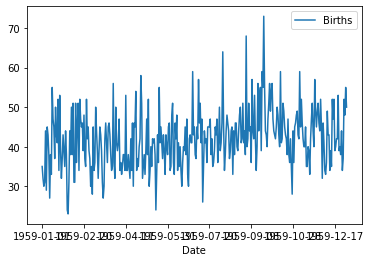

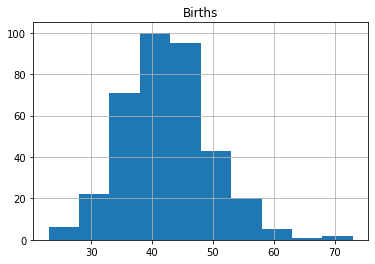

In [2]:
series1 = read_csv('daily-total-female-births.csv', header=0, index_col=0)
series1.plot()
pyplot.show()
series1.hist()
pyplot.show()

In [3]:
X = series1.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


## Splitting the series

In [4]:
def podzial(n, ser):
    X=ser.values
    split = round(len(X) / n)
    x=0
    mean=[]
    var=[]
    for i in range(n):
        x=X[i*split:(i+1)*split]
        mean.append(x.mean()) 
        var.append(x.var())
    print('means:', mean)
    print('variance:', var)

In [5]:
podzial(2,series1)

means: [39.76373626373626, 44.15384615384615]
variance: [49.21341021615746, 48.789518174133555]


In [6]:
podzial(4,series1)

means: [39.75824175824176, 39.76923076923077, 44.54945054945055, 43.75824175824176]
variance: [54.82067383166285, 43.60608622147084, 56.53326892887333, 40.73276174375076]


In [7]:
podzial(8,series1)

means: [39.54347826086956, 40.0, 38.891304347826086, 40.69565217391305, 42.5, 47.28260869565217, 43.130434782608695, 43.93023255813954]
variance: [66.29158790170132, 42.08695652173913, 49.00992438563328, 36.25519848771266, 39.25, 65.20274102079395, 35.374291115311905, 42.25094645754462]


## ADF test

In [8]:
X = series1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


## KPSS test

In [9]:
X = series1.values
result=sm.tsa.stattools.kpss(X, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.13871887792219353, 0.0634835594033453, 5, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.138719
p-value: 0.063484
truncation lag parameter:: 5.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


## Shuffling

In [10]:
random.shuffle(series1.Births)

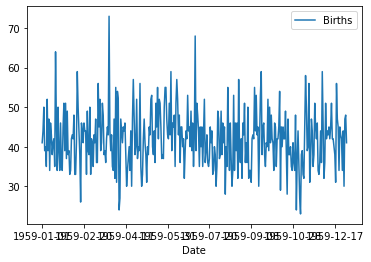

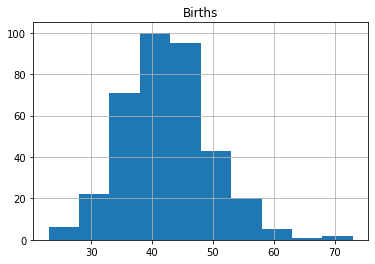

In [11]:
series1.plot()
pyplot.show()
series1.hist()
pyplot.show()

In [12]:
podzial(2,series1)
podzial(4,series1)
podzial(8,series1)

means: [42.675824175824175, 41.29120879120879]
variance: [54.47183311194299, 52.55805458277985]
means: [42.34065934065934, 43.010989010989015, 41.64835164835165, 40.934065934065934]
variance: [56.35647868614902, 52.36251660427486, 53.92029948073903, 50.94070764400434]
means: [42.108695652173914, 42.78260869565217, 40.869565217391305, 45.5, 40.608695652173914, 42.21739130434783, 39.56521739130435, 42.2093023255814]
variance: [48.66209829867676, 64.60491493383743, 53.93950850661625, 50.68478260869565, 40.194706994328925, 50.82230623818527, 58.07183364839319, 40.863169280692276]


In [13]:
X = series1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.694338
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [14]:
X = series1.values
result=sm.tsa.stattools.kpss(X, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.10195489384238265, 0.1, 2, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.101955
p-value: 0.100000
truncation lag parameter:: 2.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


# AIRLINE

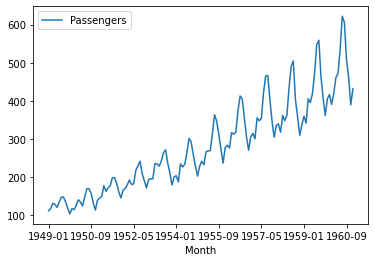

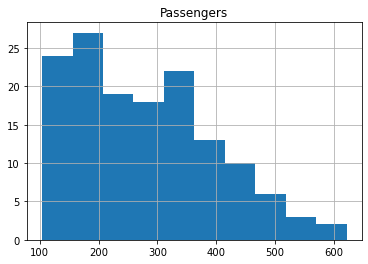

In [15]:
series2 = read_csv('international-airline-passengers.csv', header=0, index_col=0, sep=";")
series2.plot()
pyplot.show()
series2.hist()
pyplot.show()

## Splitting

In [16]:
podzial(2,series2)
podzial(4,series2)
podzial(8,series2)

means: [182.90277777777777, 377.69444444444446]
variance: [2244.0877700617284, 7367.962191358024]
means: [145.5, 220.30555555555554, 326.8888888888889, 428.5]
variance: [604.9166666666666, 1085.3233024691356, 3455.2098765432097, 6118.305555555556]
means: [128.38888888888889, 162.61111111111111, 205.5, 235.11111111111111, 293.94444444444446, 359.8333333333333, 387.1111111111111, 469.8888888888889]
variance: [162.79320987654322, 461.4598765432099, 589.3611111111111, 1142.8765432098764, 1610.4969135802469, 3129.25, 3208.2098765432097, 5602.320987654321]


## ADF test

In [17]:
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## KPSS test

In [18]:
X = series2.values
result=sm.tsa.stattools.kpss(X, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.09614984853532418, 0.1, 4, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.096150
p-value: 0.100000
truncation lag parameter:: 4.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


## Shuffling

In [19]:
random.shuffle(series1.Births)

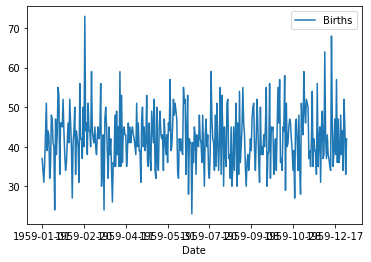

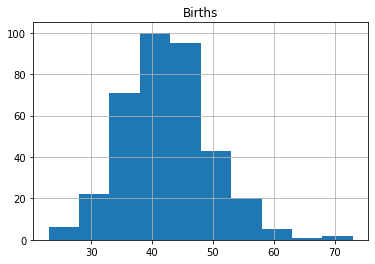

In [20]:
series1.plot()
pyplot.show()
series1.hist()
pyplot.show()

In [21]:
podzial(2,series2)
podzial(4,series2)
podzial(8,series2)

means: [182.90277777777777, 377.69444444444446]
variance: [2244.0877700617284, 7367.962191358024]
means: [145.5, 220.30555555555554, 326.8888888888889, 428.5]
variance: [604.9166666666666, 1085.3233024691356, 3455.2098765432097, 6118.305555555556]
means: [128.38888888888889, 162.61111111111111, 205.5, 235.11111111111111, 293.94444444444446, 359.8333333333333, 387.1111111111111, 469.8888888888889]
variance: [162.79320987654322, 461.4598765432099, 589.3611111111111, 1142.8765432098764, 1610.4969135802469, 3129.25, 3208.2098765432097, 5602.320987654321]


In [22]:
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [23]:
X = series2.values
result=sm.tsa.stattools.kpss(X, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.09614984853532418, 0.1, 4, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.096150
p-value: 0.100000
truncation lag parameter:: 4.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


## Getting rid of trends

### Log method

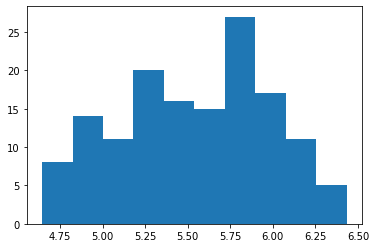

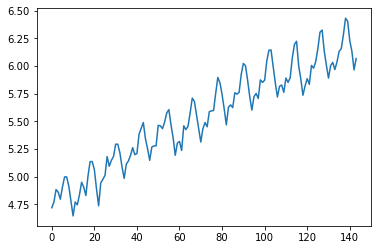

In [24]:
series2 = read_csv('international-airline-passengers.csv', header=0, index_col=0, sep=";")
X = series2.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [25]:
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


In [26]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [27]:
result=sm.tsa.stattools.kpss(X, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.11267293226016889, 0.1, 4, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.112673
p-value: 0.100000
truncation lag parameter:: 4.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


### Diff method

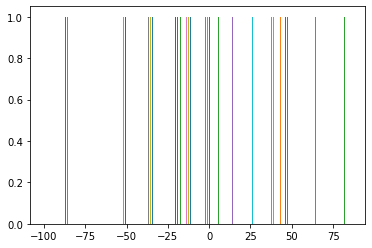

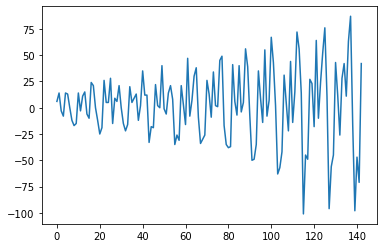

In [28]:
X = series2.values
diff = []
for i in range(1, len(X)):
    diff.append(X[i] - X[i - 1])
pyplot.hist(diff)
pyplot.show()
pyplot.plot(diff)
pyplot.show()

In [29]:
diff=np.array(diff)
split = round(len(diff) / 2)
X1, X2 = diff[0:split], diff[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=1.805556, mean2=2.676056
variance1=361.295525, variance2=1911.937314


In [30]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [31]:
result=sm.tsa.stattools.kpss(diff, regression='ct')
print(result)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('truncation lag parameter:: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

(0.024129891634650676, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
KPSS Statistic: 0.024130
p-value: 0.100000
truncation lag parameter:: 7.000000
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
